In [57]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Setup the enviorment by linking to the Haar Cascades Models

face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

#print(face_cascade)
#print(eye_cascade)

In [69]:
img = cv2.imread('face1.jpg')

# Resize the image to save space and be more manageable.
# We do this by calculating the ratio of the new image to the old image
r = 500.0 / img.shape[1]
dim = (500, int(img.shape[0] * r))

#Perform the resizing and store the resized image in variable resized
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)


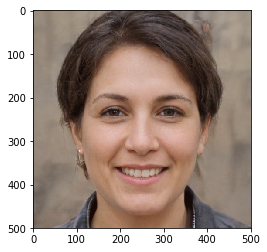

In [70]:
#Display the image
#plt.imshow(resized)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

#cv2.imshow('image',resized)
#cv2.waitKey(0) #Before moving on, wait for a keyboard click.

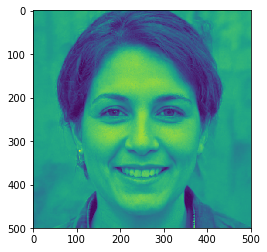

In [71]:
#Process the image - convert to BRG to grey
grey = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

plt.imshow(grey)
#plt.imshow(cv2.cvtColor(grey, cv2.COLOR_BGR2RGB))

#cv2.imshow('image',grey)
#cv2.waitKey(0) #Before moving on, wait for a keyboard click.

In [72]:
#Identify the face and eye using the haar-based classifiers.
faces = face_cascade.detectMultiScale(grey, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(resized,(x,y),(x+w,y+h),(255,0,0),2)
    roi_grey = grey[y:y+h, x:x+w]
    roi_color = resized[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_grey)

#for (ex,ey,ew,eh) in eyes:
#    cv2.rectangle(roi_color,(ex,int(ey)),(ex+ew,int(ey+eh)),(0,255,0),2)

#Display the bounding box for the face and eyes
#plt.imshow(resized)
#cv2.imshow('img',resized)
#cv2.waitKey(0)

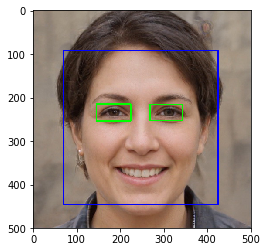

In [73]:
import numpy as np

area = np.zeros((len(eyes)))

indx = 0
for eye in eyes:
    area[indx] = eye[2]*eye[3]
    indx += 1
max_area_1 = sorted(area)[-1]
max_area_2 = sorted(area)[-2]

indx1, = np.where(area == max_area_1)
indx2, = np.where(area == max_area_2)

i = 0
for (ex,ey,ew,eh) in eyes:
    if i==indx1[0] or i==indx2[0]:
        new_ey = int(ey+eh/4)
        new_eh = int(eh-eh/2)
        cv2.rectangle(roi_color,(ex,new_ey),(ex+ew,new_ey+new_eh),(0,255,0),2)
    i += 1
#plt.imshow(resized)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

In [74]:
res = resized.copy()
mask = grey.copy()

w,h = mask.shape
tmp_img = np.zeros([w,h,3])

ex1, ey1, eh1, ew1 = eyes[indx1][0]
ex2, ey2, eh2, ew2 = eyes[indx2][0]

ey1 = int(ey1+eh1/4)
eh1 = int(eh1-eh1/2)

ey2 = int(ey2+eh2/4)
eh2 = int(eh2-eh2/2)    

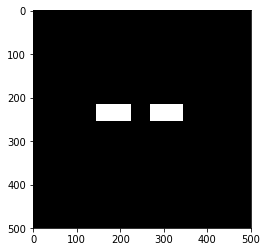

In [77]:
#print(resized.shape)
w = resized.shape[1]
h = resized.shape[0]

cv2.rectangle( resized,(0,0),(w,h),(0,0,0),-1 )

i = 0
for (ex,ey,ew,eh) in eyes:
    if i==indx1[0] or i==indx2[0]:
        new_ey = int(ey+eh/4)
        new_eh = int(eh-eh/2)
        cv2.rectangle(roi_color,(ex,new_ey),(ex+ew,new_ey+new_eh),(255,255,255),-1)
    i += 1


plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.savefig('tempfig.png')